### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Обнаружение каверов музыкальных треков</p>

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Содержание</div>

<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li>
    <li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li>
    <li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li>
    <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Подготовим-выборки-для-обучения-моделей" data-toc-modified-id="Подготовим-выборки-для-обучения-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовим выборки для обучения моделей</a></span></li>
    <li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span></li>
       <li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li>
    <li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li>

<a id="Описание-данных"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Описание данных</div>

## covers
<ul>
<li>track_id - уникальный идентификатор трека;</li>
<li>track_remake_type - метка, присвоенная редакторами. Может принимать значения ORIGINAL и COVER;</li>
<li>original_track_id - уникальный идентификатор исходного трека.</li>
</ul>

## lyrics
<ul>
<li>track_id - уникальный идентификатор трека;</li>
<li>lyricId - уникальный идентификатор текста;</li>
<li>text - текст трека.</li>
</ul>

## meta
<ul>
<li>track_id - уникальный идентификатор трека;</li>
<li>dttm - первая дата появления информации о треке;</li>
<li>title - название трека;</li>
<li>language - язык исполнения;
<li>isrc - международный уникальный идентификатор трека;</li>
<li>genres - жанры;</li>
<li>duration - длительность трека;</li>
</ul>

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">


Обнаружение треков каверов - важная продуктовая задача, которая может значительно улучшить качество рекомендаций музыкального сервиса и повысить счастье наших пользователей. 

</div>

<a id="Загрузка-библиотек"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Загрузка библиотек</div>

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics
from tabulate import tabulate

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moonkerimka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="EDA"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> EDA</div>

In [2]:
covers = pd.read_json('covers.json', lines= True)
covers.head()

,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER


In [3]:
covers.duplicated().sum()

0

In [4]:
covers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_id           71597 non-null  object
 2   track_remake_type  71597 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [5]:
lyrics = pd.read_json('lyrics.json', lines= True)
lyrics.head()

,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,0faea89b0d7d6235b5b74def72511bd8
2,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,9c6dc41d5ccd9968d07f055da5d8f741
3,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,bfd04a73e9cffdf0e282c92219a86ea1
4,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",8d70930d09cd239c948408d1317d8659


In [6]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">Ищем дубликаты в lyrics

In [7]:
lyrics = lyrics.drop_duplicates(subset = ['track_id', 'text'])

In [8]:
lyrics = lyrics.drop_duplicates(subset = ['track_id'])
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10277 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   10277 non-null  object
 1   text      10277 non-null  object
 2   track_id  10277 non-null  object
dtypes: object(3)
memory usage: 321.2+ KB


In [9]:
meta = pd.read_json('meta.json', lines= True, convert_dates=['dttm'])
meta.head()

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,2021-12-16 21:00:00,Happy New Year,EN,RUB422103970,[DANCE],161120.0
1,c57e3d13bbbf5322584a7e92e6f1f7ff,2021-11-24 14:00:33,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
2,955f2aafe8717908c140bf122ba4172d,2021-11-24 15:37:03,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,2021-11-24 15:37:03,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,2021-11-24 15:37:03,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


In [10]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71769 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   track_id  71768 non-null  object        
 1   dttm      71768 non-null  datetime64[ns]
 2   title     71768 non-null  object        
 3   language  21969 non-null  object        
 4   isrc      71455 non-null  object        
 5   genres    71768 non-null  object        
 6   duration  71768 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.8+ MB


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">Объединим все данные в одну таблицу

In [11]:
total = covers.merge(lyrics, how='left', on='track_id').merge(meta, how='left', on='track_id')

In [12]:
total

,original_track_id,track_id,track_remake_type,lyricId,text,dttm,title,language,isrc,genres,duration
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,260f21d9f48e8de874a6e844159ddf28,Left a good job in the city\nWorkin' for the m...,2009-11-11 21:00:00,Proud Mary,EN,USFI86900049,"[ROCK, ALLROCK]",187220.0
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL,2498827bd11eca5846270487e4960080,Some folks are born made to wave the flag\nOoh...,2009-11-11 21:00:00,Fortunate Son,EN,USFI86900065,"[ROCK, ALLROCK]",137780.0
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL,5237001311d4062bf2b80de30652bf58,"Uno por pobre y feo, hombre\nPero antoja'o, ay...",2009-09-21 20:00:00,La Camisa Negra,ES,USUL10400965,"[POP, FOLK, LATINFOLK]",216840.0
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL,e5b1b57090b728e8d98d2b4d9b781bf4,"Yeah!... yeah!... remember the time, baby... y...",2009-11-16 21:00:00,The Way I Are,EN,USUM70722806,"[FOREIGNRAP, RAP]",179660.0
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER,NaN,NaN,2009-09-17 20:00:00,Extraball,EN,FR8Q10900116,[ELECTRONICS],212620.0
...,...,...,...,...,...,...,...,...,...,...,...
71592,4788e0bf61d80ef5ec9380aa8a8119d9,4788e0bf61d80ef5ec9380aa8a8119d9,ORIGINAL,NaN,NaN,2023-09-28 21:00:00,"Милый, прощай",None,RUAGT2312928,"[POP, RUSPOP]",178980.0
71593,None,78b2db35476f134dc3cdfbf4d77ba034,COVER,NaN,NaN,2023-10-01 13:55:45,Habits (Stay Hight),EN,TCAHK2396284,[ELECTRONICS],149570.0
71594,None,e720ff378efe032df56e0e656a6a92d3,COVER,NaN,NaN,2023-10-05 21:00:00,Arcade,EN,TCAHM2318975,"[FOREIGNBARD, BARD]",201580.0
71595,554e33d79e258da91149c3a4985cf6a1,554e33d79e258da91149c3a4985cf6a1,ORIGINAL,NaN,NaN,2023-10-05 21:00:00,Май,None,SMRUS0076417,"[RUSRAP, RAP]",156870.0


In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_track_id  4821 non-null   object        
 1   track_id           71597 non-null  object        
 2   track_remake_type  71597 non-null  object        
 3   lyricId            10123 non-null  object        
 4   text               10123 non-null  object        
 5   dttm               71597 non-null  datetime64[ns]
 6   title              71597 non-null  object        
 7   language           21826 non-null  object        
 8   isrc               71287 non-null  object        
 9   genres             71597 non-null  object        
 10  duration           71597 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 6.0+ MB


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<ul>
<li>Обнаружены пропуски значений в столбцах.</li>
<li>В данных дубликаты удалены.</li>
</ul></div>

<a id="Предобработка-данных"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Предобработка данных</div>

In [14]:
total['dttm'] = total['dttm'].dt.year

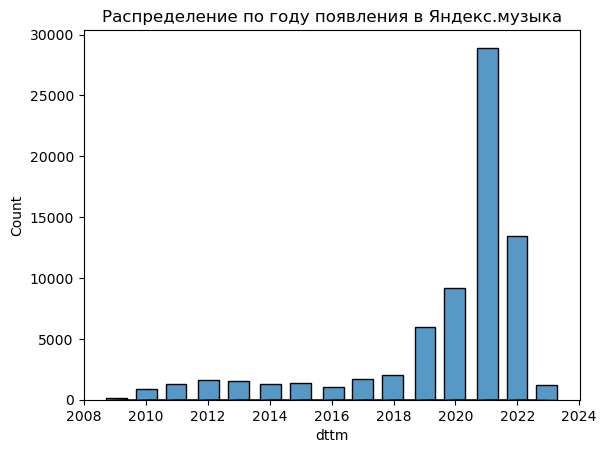

In [15]:
sns.histplot(data=total, x="dttm", shrink=7).set(title='Распределение по году появления в Яндекс.музыка');

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
22 сентября 2010 года «Яндекс» объявил о запуске отдельного сервиса «Яндекс. Музыка», поэтому музыка загружается с 2009 года. Я считаю, что необходимо удалить признак dttm, так как он не является информативным.

In [16]:
total = total.drop('dttm', axis=1)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Посмотрим, на каком языке больше оригинальных песен.

In [17]:
total['language'].value_counts().reset_index()

,language,count
0,EN,15194
1,ES,1746
2,RU,1545
3,IT,907
4,HI,285
...,...,...
80,SE,1
81,LV,1
82,AV,1
83,IU,1


In [18]:
total[(total['language'] == 'EN') & (total['track_remake_type'] == 'ORIGINAL')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1298 entries, 0 to 71542
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_track_id  1298 non-null   object 
 1   track_id           1298 non-null   object 
 2   track_remake_type  1298 non-null   object 
 3   lyricId            766 non-null    object 
 4   text               766 non-null    object 
 5   title              1298 non-null   object 
 6   language           1298 non-null   object 
 7   isrc               1298 non-null   object 
 8   genres             1298 non-null   object 
 9   duration           1298 non-null   float64
dtypes: float64(1), object(9)
memory usage: 111.5+ KB


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">В данных преобладают оригиналы английских песен

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"> В целевой переменной отметим оригинал 1, а кавер 0

In [19]:
total['track_remake_type'] = np.where(total['track_remake_type'] == 'ORIGINAL', 1, 0)
total

,original_track_id,track_id,track_remake_type,lyricId,text,title,language,isrc,genres,duration
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,1,260f21d9f48e8de874a6e844159ddf28,Left a good job in the city\nWorkin' for the m...,Proud Mary,EN,USFI86900049,"[ROCK, ALLROCK]",187220.0
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,1,2498827bd11eca5846270487e4960080,Some folks are born made to wave the flag\nOoh...,Fortunate Son,EN,USFI86900065,"[ROCK, ALLROCK]",137780.0
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,1,5237001311d4062bf2b80de30652bf58,"Uno por pobre y feo, hombre\nPero antoja'o, ay...",La Camisa Negra,ES,USUL10400965,"[POP, FOLK, LATINFOLK]",216840.0
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,1,e5b1b57090b728e8d98d2b4d9b781bf4,"Yeah!... yeah!... remember the time, baby... y...",The Way I Are,EN,USUM70722806,"[FOREIGNRAP, RAP]",179660.0
4,None,d6288499d0083cc34e60a077b7c4b3e1,0,NaN,NaN,Extraball,EN,FR8Q10900116,[ELECTRONICS],212620.0
...,...,...,...,...,...,...,...,...,...,...
71592,4788e0bf61d80ef5ec9380aa8a8119d9,4788e0bf61d80ef5ec9380aa8a8119d9,1,NaN,NaN,"Милый, прощай",None,RUAGT2312928,"[POP, RUSPOP]",178980.0
71593,None,78b2db35476f134dc3cdfbf4d77ba034,0,NaN,NaN,Habits (Stay Hight),EN,TCAHK2396284,[ELECTRONICS],149570.0
71594,None,e720ff378efe032df56e0e656a6a92d3,0,NaN,NaN,Arcade,EN,TCAHM2318975,"[FOREIGNBARD, BARD]",201580.0
71595,554e33d79e258da91149c3a4985cf6a1,554e33d79e258da91149c3a4985cf6a1,1,NaN,NaN,Май,None,SMRUS0076417,"[RUSRAP, RAP]",156870.0


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"> В целевой переменной отметим оригинал 1, а кавер 0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"> В признаке isrc 6 и 7 символы являются годом присвоения кода isrc треку, добавим эту даты в признаки

In [20]:
total['isrc'] = total['isrc'].str.replace("-","")

In [21]:
total['isrc_year'] = total['isrc'].str[5:7]
total = total.drop_duplicates(subset = 'isrc', ignore_index = True)
total = total.dropna(subset=['isrc']).reset_index(drop=True)
total = total.astype({'isrc_year':'int'})
for i in range(len(total.index)):
    if total.loc[i,'isrc_year']>23:
        total.loc[i,'isrc_year'] = total.loc[i,'isrc_year']+1900
    else:
        total.loc[i,'isrc_year'] = total.loc[i,'isrc_year']+2000

In [22]:
#pip install -U sentence-transformers

In [23]:
# напишем функцию, которая оставит в тексте только кириллические символы и пробелы
def clear_text(text):
    text = re.sub(r'[^a-zA-Z ]', ' ', str(text))
    return " ".join(text.split())

In [24]:
from tqdm.notebook import tqdm
tqdm.pandas()

total['lemm_title'] = total['title'].progress_apply(clear_text)

  0%|          | 0/71115 [00:00<?, ?it/s]

In [25]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71115 entries, 0 to 71114
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_track_id  4720 non-null   object 
 1   track_id           71115 non-null  object 
 2   track_remake_type  71115 non-null  int64  
 3   lyricId            9974 non-null   object 
 4   text               9974 non-null   object 
 5   title              71115 non-null  object 
 6   language           21719 non-null  object 
 7   isrc               71115 non-null  object 
 8   genres             71115 non-null  object 
 9   duration           71115 non-null  float64
 10  isrc_year          71115 non-null  int64  
 11  lemm_title         71115 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 6.5+ MB


In [26]:
total = total.drop(['original_track_id',
                    'track_id', 'lyricId',
                    'text', 'title',
                    'language', 'isrc',
                    'genres', 'lemm_title'], axis=1)


In [27]:
#from sentence_transformers import SentenceTransformer

In [28]:
#model = SentenceTransformer('sentence-transformers/LaBSE')

<a id="Подготовим-выборки-для-обучения-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Подготовим выборки для обучения моделей</div>

In [29]:
X = total.drop('track_remake_type', axis=1)
y = total['track_remake_type']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    random_state=42)
print(f"Размер тренировочного корпуса: {len(X_train)}")
print(f"Размер тренировочного корпуса: {len(X_test)}")

Размер тренировочного корпуса: 64003
Размер тренировочного корпуса: 7112


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<ul>
<li>Данные разделены на обучающую и тестовую выборки.</li>

</ul>
</div>

<a id="Обучение-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Обучение моделей</div>

In [32]:
def conf_matrix(y_test, y_pred):
    return metrics.confusion_matrix(y_test, y_pred)
    

In [33]:
def accuracy(y_test, y_pred):
    return metrics.accuracy_score (y_test, y_pred)
    

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Logistic Regression</p>

In [34]:
log_regression = LogisticRegression()

#fit the model using the training data
log_regression. fit(X_train,y_train)
y_pred_log = log_regression.predict(X_test)

In [35]:
conf_matrix(y_test, y_pred_log)

array([[6723,    0],
       [ 389,    0]])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"> 
<ul>
<li>Истинно положительных предсказаний: 6723</li>
<li>Истинно отрицательные прогнозы: 0</li>
<li>Ложноположительные прогнозы: 389</li>
<li>Ложноотрицательные прогнозы: 0</li>
</ul>

In [36]:
print(" Accuracy_log:", accuracy(y_test, y_pred_log))

 Accuracy_log: 0.9453037120359955


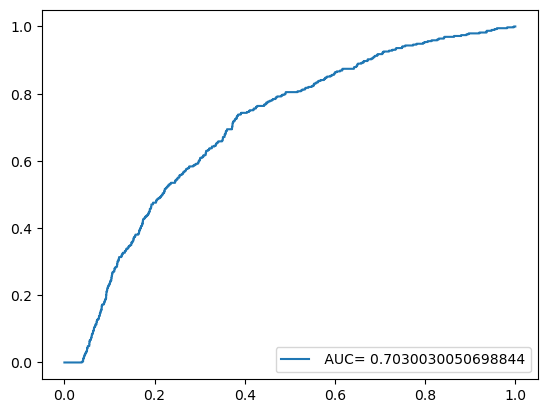

In [37]:
#define metrics
y_pred_proba_log = log_regression. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba_log)
auc = metrics.roc_auc_score (y_test, y_pred_proba_log)

#create ROC curve
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">SGD</p>

In [38]:
sgd = SGDClassifier()
#fit the model using the training data
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [39]:
conf_matrix(y_test, y_pred_sgd)

array([[6685,   38],
       [ 389,    0]])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left"> 
<ul>
<li>Истинно положительных предсказаний: 6685</li>
<li>Истинно отрицательные прогнозы: 38</li>
<li>Ложноположительные прогнозы: 389</li>
<li>Ложноотрицательные прогнозы: 0</li>
</ul>

In [40]:
print(" Accuracy_sgd:", accuracy(y_test, y_pred_sgd))

 Accuracy_sgd: 0.9399606299212598


<a id="Сравнение-моделей"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Сравнение моделей</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Оценка качества исследованных моделей с помощью best_score
</p>

In [42]:
data_best_score = {'Models':['SGD','Logistic Regresion'],
     'accuracy': [round(accuracy(y_test, y_pred_sgd), 2), round(accuracy(y_test, y_pred_log), 2)]}
df_best_score=pd.DataFrame(data_best_score)
print(tabulate(df_best_score, headers='keys', tablefmt='psql'))

+----+--------------------+------------+
|    | Models             |   accuracy |
|----+--------------------+------------|
|  0 | SGD                |       0.94 |
|  1 | Logistic Regresion |       0.95 |
+----+--------------------+------------+


<a id="Тестирование-лучшей-модели"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Тестирование лучшей модели</div>